In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_data(text):
  text = text.lower()
  text = re.sub('-',' ',text)
  text = re.sub(f'[{string.digits}]',' ',text)
  text = re.sub(f'[{string.punctuation}]',' ',text)
  text=re.sub(r'\s+[a-z]\s+',' ',text+' ')
  text = re.sub(r'\s+',' ',text)
  words = text.split()
  processed_words = []
  for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        processed_words.append(stemmed_word)
  text = ' '.join(processed_words)
  return text

In [ ]:
input_text = "ham,Even my brother is not like to speak winner with me. They treat me like aids patent.,,,"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_data(input_text)}')

Original text: ham,Even my brother is not like to speak winner with me. They treat me like aids patent.,,,
Cleaned text: ham ev broth lik speak win tre lik aid pat


In [ ]:
test_path=r'/content/drive/MyDrive/spam.csv'
test_data=pd.read_csv( test_path , sep=',',engine='python', encoding='latin-1', header=None, names=['label', 'text', 'col3', 'col4', 'col5'], quotechar='"')

test_data['col3'].fillna('', inplace=True)
test_data['col4'].fillna('', inplace=True)
test_data['col5'].fillna('', inplace=True)

test_data['mail'] = test_data['col4'] + test_data['col5']+test_data['col3']+test_data['text']

test_data.drop(['text','col3','col4','col5'],axis=1,inplace=True)

test_data['mail']=test_data['mail'].apply(clean_data)
test_data.head()
#test_data.describe()

,label,mail
0,v1,v
1,ham,go jurong point crazy avail bug gre world la b...
2,ham,ok lar jok wif on
3,spam,fre entry wkly comp win fa cup fin tkts st may...
4,ham,u dun say ear hor c already say


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


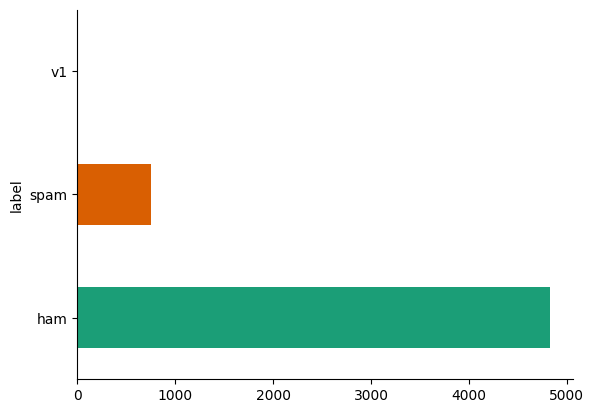

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
test_data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X=test_data['mail']
Y=test_data['label']

vectorizer=TfidfVectorizer()
X_feats=vectorizer.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X_feats,Y,test_size=0.2,random_state=12)

model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       149
          v1       0.00      0.00      0.00         1

    accuracy                           0.97      1115
   macro avg       0.65      0.59      0.62      1115
weighted avg       0.97      0.97      0.97      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sample_email = ["Dear Customer, We have detected suspicious activity on your account. For your security, please verify your identity immediately. Failure to do so may result in your account being suspended. Click the link below to verify your account details: [Verify Your Account](http://example.com/secure) This is an automated message. Please do not reply. Sincerely, The Security Team"]

cleaned_email = [clean_data(email) for email in sample_email]

# Convert the sample email to TF-IDF features
sample_features = vectorizer.transform(cleaned_email)

# Predict using the trained model
prediction = model.predict(sample_features)

print("Predicted Label:", prediction[0],"\n", cleaned_email)

Predicted Label: ham 
 ['dear custom detect suspicy act account sec pleas ver id immedy fail may result account suspend click link ver account detail ver account http exampl com sec autom mess pleas reply sint sec team']
